In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix

%matplotlib inline

In [3]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [4]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#Shape of the Dataset
df.shape

(699, 11)

In [6]:
#data preprocessing
df.drop(['id'],axis=1,inplace = True)

In [7]:
# Columns in the dataset
df.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [8]:
df.replace('?',np.nan,inplace=True)

In [9]:
df.isna().sum()


clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [10]:
df.isna().sum()

clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [11]:
df.fillna(method='ffill', inplace=True)

In [12]:
df.isna().sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [13]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   clump_thickness         699 non-null    int64
 1   uniform_cell_size       699 non-null    int64
 2   uniform_cell_shape      699 non-null    int64
 3   marginal_adhesion       699 non-null    int64
 4   single_epithelial_size  699 non-null    int64
 5   bare_nuclei             699 non-null    int64
 6   bland_chromatin         699 non-null    int64
 7   normal_nucleoli         699 non-null    int64
 8   mitoses                 699 non-null    int64
 9   class                   699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [15]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.583571,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.681309,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.701137,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.663669,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.579340,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.583571,0.681309,0.701137,0.663669,0.579340,1.000000,0.671398,0.571895,0.337078,0.807394
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671398,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.571895,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.337078,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.807394,0.756616,0.712244,0.423170,1.000000


In [16]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 

Y = df['class'].values
X = df.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [17]:
# Testing Options
scoring = 'accuracy'

In [18]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


For CART Model:Mean accuracy is 0.948895 (Std accuracy is 0.030585)
For SVM Model:Mean accuracy is 0.971386 (Std accuracy is 0.013512)
For NB Model:Mean accuracy is 0.963223 (Std accuracy is 0.025463)
For KNN Model:Mean accuracy is 0.969345 (Std accuracy is 0.016428)


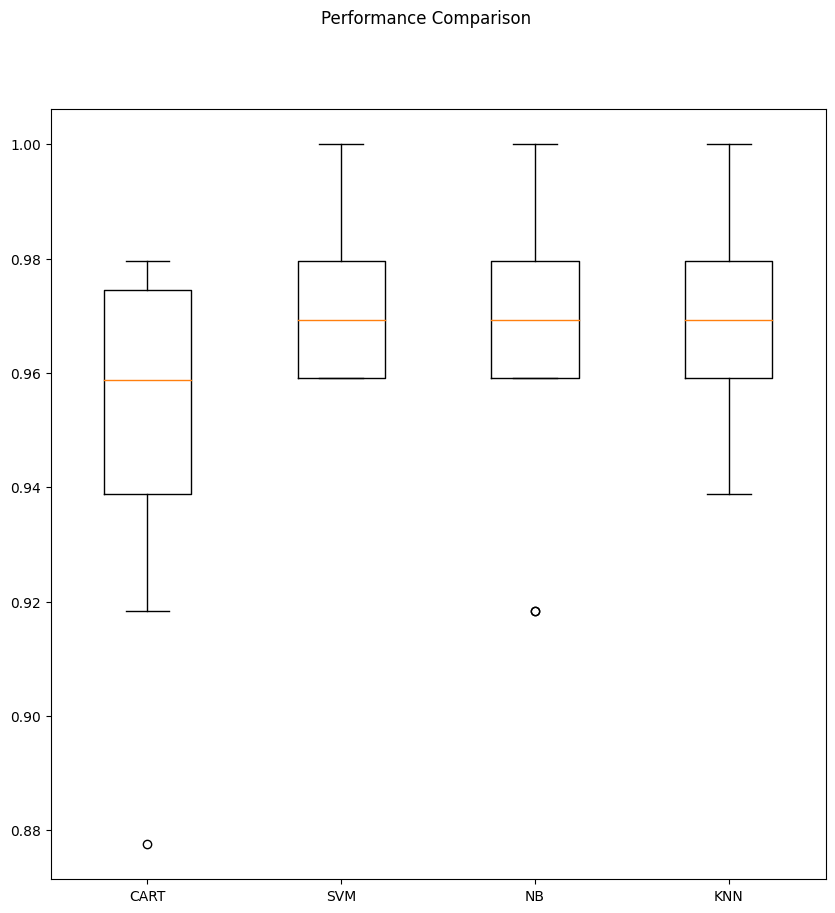

In [19]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    


Model: CART
Accuracy score: 0.9
Classification report:
               precision    recall  f1-score   support

           2       0.89      0.96      0.92       133
           4       0.92      0.79      0.85        77

    accuracy                           0.90       210
   macro avg       0.91      0.88      0.89       210
weighted avg       0.90      0.90      0.90       210


Model: SVM
Accuracy score: 0.9714285714285714
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       133
           4       0.96      0.96      0.96        77

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210


Model: NB
Accuracy score: 0.9523809523809523
Classification report:
               precision    recall  f1-score   support

           2       0.96      0.96      0.96       133
           4       0.94      0.94      

In [21]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.9714285714285714


array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2], dtype=int64)

In [22]:
example_measures = [[4,2,1,1,1,2,3,2,1]]
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [23]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[4,2,1,1,1,2,3,2,1]]))

[2]
